# Scale-free network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

output_path = '/cluster/home/buchsr/output'
save_path = '/cluster/home/buchsr/opinion-formation/media'

In [7]:
tag = 'scalefree_cluster'
n = 400
m = 3
n_iter = 100
all_p = np.arange(0,1.2,0.2)
all_phis = np.arange(0,1,0.01)

In [8]:
S = []
for p in all_p:
    list_files = glob.glob('{0}/ComponentsSize_{1}_n{2}_m{3}_gamma10_niter{4}_p_{5}_phi*.npy'.format(output_path, tag, 
                                                                                                     n, m, n_iter,
                                                                                                    p))
    phis = [float(f.split('phi_')[1].split('.npy')[0]) for f in list_files]
    idx = np.argsort(phis)
    phis = np.array(phis)[idx]
    id_undone = [i+1 for i, phi in enumerate(all_phis) if phi not in phis]
    list_files = np.array(list_files)[idx]
    print(len(list_files))
    print(list_files[0])
    s = []
    size = np.arange(0, n+1, 1)
    for f in list_files:
        s.append([max(size[real!=0]) for real in np.load(f)])
    s = np.stack(s)
    S.append(s)

100
/cluster/home/buchsr/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_0.0_phi_0.0.npy
100
/cluster/home/buchsr/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_0.2_phi_0.0.npy
100
/cluster/home/buchsr/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_0.4_phi_0.0.npy
100
/cluster/home/buchsr/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_0.6000000000000001_phi_0.0.npy
100
/cluster/home/buchsr/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_0.8_phi_0.0.npy
100
/cluster/home/buchsr/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_1.0_phi_0.0.npy


We vary p, no effect:

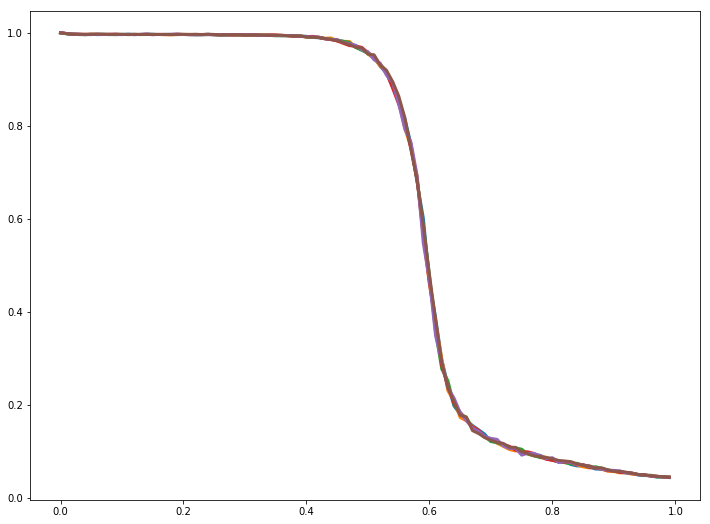

In [5]:
fig, ax = plt.subplots(figsize=(12, 9))
for i, (biggest_coms, ps) in enumerate(zip(S, p)):
    ax.plot(all_phis, biggest_coms.mean(axis=1)*n**(-1), color='C{0}'.format(i), linewidth=3, 
            label='p = {0}'.format(ps))

In [21]:
S = []
all_n = [200, 400, 600]
for n_i in all_n:
    list_files = glob.glob('{0}/ComponentsSize_{1}_n{2}_m{3}_gamma10_niter{4}_p_{5}_phi*.npy'.format(output_path, tag, 
                                                                                                     n_i, m, n_iter,
                                                                                                    0.2))
    phis = [float(f.split('phi_')[1].split('.npy')[0]) for f in list_files]
    idx = np.argsort(phis)
    phis = np.array(phis)[idx]
    id_undone = [i+1 for i, phi in enumerate(all_phis) if phi not in phis]
    list_files = np.array(list_files)[idx]
    print(len(list_files))
    print(list_files[0])
    s = []
    size = np.arange(0, n_i+1, 1)
    for f in list_files:
        s.append([max(size[real!=0]) for real in np.load(f)])
    s = np.stack(s)
    S.append(s)

100
/cluster/home/buchsr/output/ComponentsSize_scalefree_cluster_n200_m3_gamma10_niter100_p_0.2_phi_0.0.npy
100
/cluster/home/buchsr/output/ComponentsSize_scalefree_cluster_n400_m3_gamma10_niter100_p_0.2_phi_0.0.npy
100
/cluster/home/buchsr/output/ComponentsSize_scalefree_cluster_n600_m3_gamma10_niter100_p_0.2_phi_0.0.npy


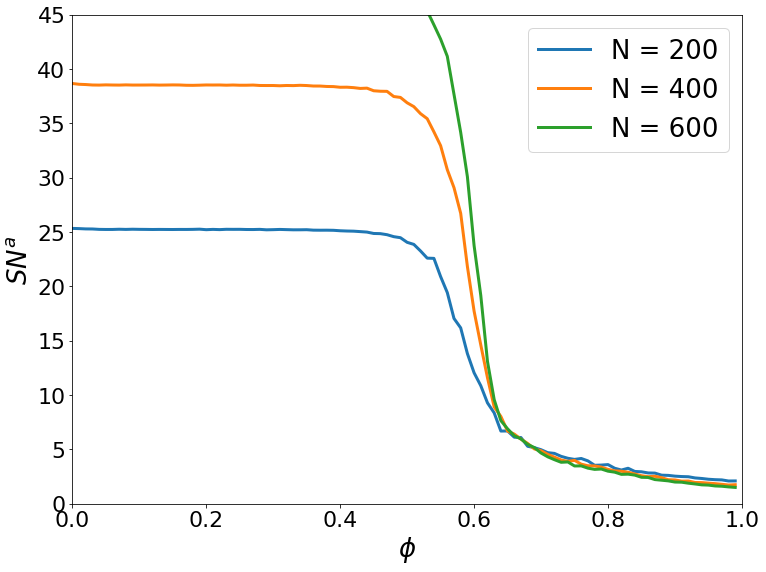

In [26]:
a = 0.61
fig, ax = plt.subplots(figsize=(12, 9))
for i, (biggest_coms, n_i) in enumerate(zip(S, all_n)):
    ax.plot(all_phis, biggest_coms.mean(axis=1)*n_i**(a-1), color='C{0}'.format(i), linewidth=3, 
            label='N = {0}'.format(n_i))

ax.set_xlabel('$\phi$', fontsize=26)
ax.set_ylabel('$SN^a$', fontsize=26)
ax.set_xlim((0,1))
ax.legend(fontsize=26)
ax.set_ylim((0,45))
ax.tick_params(labelsize=22)

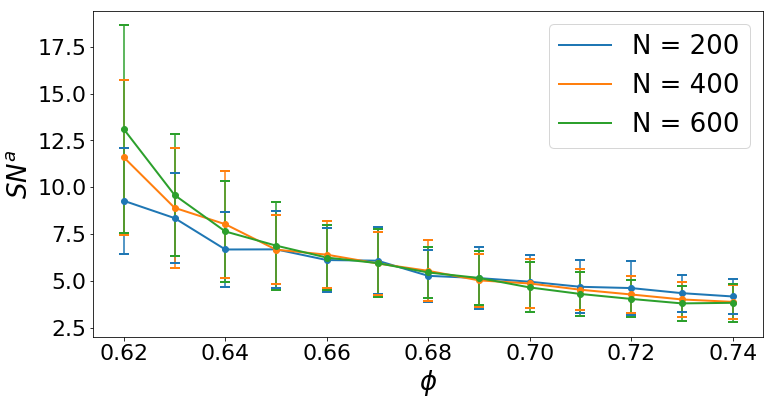

In [32]:
a = 0.61
fig, ax = plt.subplots(figsize=(12, 6))
plotrange = [62, 75]
for i, (biggest_coms, n_i) in enumerate(zip(S, all_n)):
    ax.plot(all_phis[plotrange[0]:plotrange[1]], biggest_coms.mean(axis=1)[plotrange[0]:plotrange[1]]*n_i**(a-1), color='C{0}'.format(i), linewidth=2, 
            label='N = {0}'.format(n_i))
    ax.errorbar(all_phis[plotrange[0]:plotrange[1]], biggest_coms.mean(axis=1)[plotrange[0]:plotrange[1]]*n_i**(a-1), 
                yerr=biggest_coms.std(axis=1)[plotrange[0]:plotrange[1]]*n_i**(a-1), fmt='o', capsize=5, color='C{0}'.format(i),
               capthick=2)


ax.set_xlabel('$\phi$', fontsize=26)
ax.set_ylabel('$SN^a$', fontsize=26)
ax.legend(fontsize=26)
ax.tick_params(labelsize=22)

0.6400272145008987

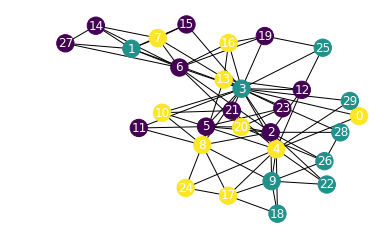

In [17]:
n = 30 # number of nodes
gamma = 10
n_opinion = int(n/gamma)
m = 3
p = 1
#Generate Powerlaw cluster graph
G = OpinionGraph.CreatePowerlawCluster(n, m, p, n_opinion, True)
#plot the opinion graph
G.plot()
G.average_clustering()

In [9]:
n = 400 # number of nodes
gamma = 10
n_opinion = int(n/gamma)
m = 4
p = 0.2 
phi = 0.3

t0 = time.time()
#Create graph
G = OpinionGraph.CreatePowerlawCluster(n, m, p, n_opinion, True)
log(t0, 'Random graph created')
G.summary()
#iterate
n_steps = OpinionAlgorithm.SimulationEndConsensus(G, phi, verbose=False, checkconsensus=1000)
log(t0, 'Consensus found')
G.summary()

0.010801315307617188 Random graph created
Total number of components: 1
Components size: Counter({400: 1})
All components in consensus: False
Consensus reached: False
Percentage of nodes in components in consensus state: 0.0
48.16092109680176 Consensus found
Total number of components: 2
Components size: Counter({399: 1, 1: 1})
All components in consensus: True
Consensus reached: True
Percentage of nodes in components in consensus state: 1.0


In [ ]:

comp = G.CountComponents()
comp = dict(comp)

components_num = np.zeros(n+1)
components_num[list(comp.keys())] = list(comp.values())